=============================================================================================================
 
 ## Line Integrals - Part I ##
 
 **With Python SymPy**
 
The next Examples and Practice Problems and their images come from **Paul Dawkins** excellent lecture notes: http://tutorial.math.lamar.edu/index.aspx, where you can the find the underlying theory of calculations and the detailed 'paper and pen' solutions. To use this material you must read *'Terms of Use'* from https://tutorial.math.lamar.edu/Terms.aspx.


=========================================================================================================================

Given a curve *C*:  $\vec{r}(t) = \left< x(t), y(t), z(t) \right>$
 the **line integral of a scalar field $f(x,y,z) $
 along the curve** is $$\int_C f(x,y,z) ds = \int_a^b f(x(t), y(t), z(t))|d\vec{r}/dt|dt $$.
 
 =======================================================================================================================


To calculate the line integrals we use three different methods.


1. The coordinate variables  x, y, z are defined as  functions of the parameter t. The vector field components F1, F2, F3 are defined to be functions of x(t), y(t), z(t). Then the expression for the integrable in the general form without the problem specifics is formed. When solving a problem this framework is used by substituting the field and the parameterized coordinate functions of the curve in the integrand. The framework is set to be 3D, for 2D fields and curves just set F3 = 0 and z(t) = 0. This method represents more math than the next two. 

2.  SymPy has a function 'Curve()', which offers an easy automated way to calculate line integrals. There you pass the parameterization  of the curve as argument to the function. Then you 'vector_integrate' the field along this path.

3.  If the path is a line segment, you can use the 'Segment()' function for the path by just giving the end points of the segment as arguments. Here you have to give the scalar field in CoordSys3D('C'). Use 'vector_integrate'


In [1]:
import numpy as np
import sympy as sp
from sympy.vector import *
from sympy import sin, cos, pi, sqrt, Curve
from sympy.vector import CoordSys3D, vector_integrate
C = CoordSys3D('C')
from sympy.geometry import Segment 
x, y, z = sp.symbols('x y z')

In [2]:
# GENERAL FRAMEWORK     

t = sp.symbols('t', real=True)                                                # # The parameter (variable)
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)                                                                      # x coordinate as a function of parameter t
y = y(t)                                                         
z = z(t)
r = sp.Matrix([x, y, z])                                                      # Position vector to the points on the curve
f = f(x,y,z)                                                                  # Scalar field
integrand = f*sp.diff(r,t).norm()                                             # From the definition above

'Notes:'
'This integrand is used in several examples by placing a scalar field f(x,y,z) and a path <x(t), y(t), z(t)) in it.'
'The field f may be in parameter form or not'
'The GENERAL FRAMEWORK is needed again after using "sympy Curve"  or  "sympy.geometry Segment" '
integrand   

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

**Example 1.** Evaluate  $ \displaystyle \int\limits_{C}{{x{y^4}\,ds}} $ where $C$ is the right half of the circle ${x^2} + {y^2} = 16$ traced out in a counter clockwise direction.


In [3]:
# The scalar field f and the path  C in parameter form are placed in the integrand
integrand1 = integrand.subs([(f, x*y**4),
                             (x, 4*sp.cos(t)),
                             (y, 4*sp.sin(t)),
                             (z, 0)]).doit().simplify()
I1 = sp.integrate(integrand1, (t, -sp.pi/2, sp.pi/2))                                # Integration with SymPy
print('The line integral of the function f along the path C1  ≈', sp.N(I1, 5))       # 5 digit approximation
I1                                                                                   # The exact result
 

The line integral of the function f along the path C1  ≈ 1638.4


8192/5

=======================================================================================================================

**Example 2.** Evaluate $\displaystyle \int\limits_{C}{{4{x^3}\,ds}}$ where $C$ is the curve shown below.

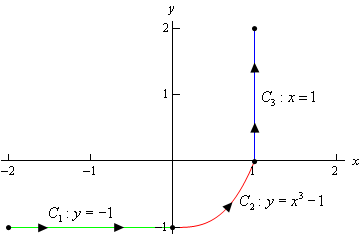

 Parameterize each of the curves:
 $$\begin{align*}& {C_1}\,\,\,:\,\,\,\,x = t,\,\,y =  - 1\,,\,\,\,\,\,\,\,\,\,\,\,\, - 2 \le t \le 0\\ & {C_2}\,\,:\,\,\,\,\,x = t,\,\,y = {t^3} - 1,\,\,\,\,\,\,\,\,\,\,0 \le t \le 1\\ & {C_3}\,\,:\,\,\,\,\,x = 1,\,\,\,y = t,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,0 \le t \le 2  \end{align*} $$
 
We integrate separate over each of these curves and then sum up the integrals.
 

In [4]:
#C1: The scalar field f and the path  C1 in parameter form are placed in the integrand
integrand1 = integrand.subs([(f, 4*x**3),
                             (x, t),
                             (y, -1),
                             (z, 0)]).doit().simplify()
I1 = sp.integrate(integrand1, (t, -2, 0))                                                      # Integration with SymPy
print('The line integral of the function f along the path C1  ≈', sp.N(I1, 5))                 # 5 digit approximation 

The line integral of the function f along the path C1  ≈ -16.000


In [5]:
#C2: GENERAL FRAMEWORK
t = sp.symbols('t', real=True)                                                 # The parameter (variable)
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)                                                                       # x coordinate as a function of parameter t
y = y(t)                                                         
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition above


In [6]:
#C2: The scalar field f and the path C2 in parameter form are placed in the integrand
integrand2 = integrand.subs([(f, 4*x**3),
                             (x, t),
                             (y, t**3 - 1),
                             (z, 0)]).doit().simplify()
I2 = sp.integrate(integrand2, (t, 0, 1))                                                       # Integration with SymPy
print('The line integral of the function f along the path C2  ≈', sp.N(I2, 5))                 # 5 digit approximation    

The line integral of the function f along the path C2  ≈ 2.2684


In [7]:
#C2: This can also be integrated using "SymPy Curve" (without using 'GENERAL FRAMEWORK')
f  = 4*t**3                                                                                    # Parameterized scalar field
C2 = Curve((t, t**3), (t, 0, 1))                                                               # Parameterized 2D curve
I2 = vector_integrate(f, C2 )         #.doit().simplify()
print(sp.N(I2, 5)) 

2.2684


In [8]:
#C3: GENERAL FRAMEWORK             (This is needed after using "SymPy Curve" or 'sympy.geometry Segment')
t = sp.symbols('t', real=True)                                                 # The parameter (variable)
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)                                                                       # x coordinate as a function of parameter t
y = y(t)                                                         
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition above


In [9]:
#C3: The scalar field f and the path C3 in parameter form are placed in the integrand
integrand3 = integrand.subs([(f, 4*x**3),
                             (x, 1),
                             (y, t),
                             (z, 0)]).doit().simplify()
I3 = sp.integrate(integrand3, (t, 0, 2))                                           
print('The line integral of the function f along the path C3  ≈', sp.N(I3, 5))           # 5 digit approximation 

The line integral of the function f along the path C3  ≈ 8.0000


In [10]:
# This can also be easily calculated with 'sympy.geometry Segment'  (no need for 'GENERAL FRAMEWORK')
f = 4*C.x**3                                                                             # Scalar field in CoordSys3D('C')
s3 = Segment((1, 0), (1, 2))                                                             # 2D line segment
I3 = vector_integrate(f, s3)   #.doit().simplify()                                       # Line integral 
print('I3 ≈', sp.N(I3, 5))        # 5 digit approximation   


I3 ≈ 8.0000


In [11]:
# The sum of the separate line integrals in 4-digit approximation
I = sp.N((I1 + I2 + I3), 4)
I

-5.732

=========================================================================================================================

**Examples 3 and 4.** Evaluate $\displaystyle \int\limits_{C}{{4{x^3}\,ds}}$ where $C$ is the  the line segment  **a)** &nbsp; from  $\left( { - 2, - 1} \right)$ to $\left( { 1, 2} \right)$ &nbsp; &nbsp; **b)** &nbsp;  from $\left( {1, 2} \right)$ to $\left( { - 2, - 1} \right)$


In [12]:
# This can be easily calculated with 'sympy.geometry Segment'  (no need for 'GENERAL FRAMEWORK')
# (a)
f = 4*C.x**3                                                                             # Scalar field in CoordSys3D('C')
sa = Segment((-2, -1), (1, 2))                                                           # 2D line segment
Ia = vector_integrate(f, sa)   #.doit().simplify()                                       # Line integral 
print('The line integral of the function f along line segment a) ≈', sp.N(Ia, 5))        # 5 digit approximation   

# (b)
sb = Segment((1, 2), (-2, -1))                                                           # 2D line segment
Ib = vector_integrate(f, sb)   #.doit().simplify()                                       # Line integral 
print('The line integral of the function f along the line segment b) ≈', sp.N(Ib, 5))    # 5 digit approximation   


The line integral of the function f along line segment a) ≈ -21.213
The line integral of the function f along the line segment b) ≈ -21.213


======================================================================================================================

**Example 5.** Evaluate $\displaystyle \int\limits_{C}{{4{x^3}\,ds}}$ for each of the following curves.

$a) \,\, C1: \,\,{C_1}:y = {x^2},\,\,\, - 1 \le x \le 1$

$b) \,\, C2:$  &nbsp; The line segment from  &nbsp; $\left( { - 1,1} \right) $ to $ \left( {  1,1} \right)$

$c) \,\, C3:$  &nbsp; The line segment from &nbsp; $\left( { 1,1} \right) $ to $ \left( { - 1,1} \right)$


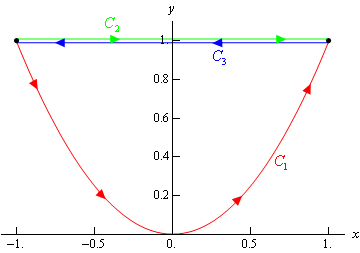

In [13]:
# THE GENERAL FRAMEWORK           (This is needed after using "SymPy Curve" or 'sympy.geometry Segment')
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)                                                                       # x coordinate as a function of parameter t
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition of the line integral
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [14]:
#C1: The scalar field f and the path C1 in parameter form are placed in the integrand
integrand_C1 = integrand.subs([(f, x),
                              (x, t),
                              (y, t**2),
                              (z, 0)]).doit().simplify()
Ia = sp.integrate(integrand_C1, (t, -1, 1))                                         # Integration with SymPy
print('The line integral of the function f along the path C1  ≈', sp.N(Ia, 5))      # 5 digit approximation 

The line integral of the function f along the path C1  ≈ 0


In [15]:
# The parts b) and c) can be easily calculated with 'sympy.geometry Segment'    (no need for 'GENERAL FRAMEWORK')
f = C.x                                                                             # Scalar field in CoordSys3D('C')
sb = Segment((-1, 1), (1, 1))                                                       # 2D line segment C2
sc = Segment((1, 1), (-1, 1))                                                       # 2D line segment C3
Ib = vector_integrate(f, sb)   #.doit().simplify()                                  # Line integral 
Ic = vector_integrate(f, sc)   #.doit().simplify()  
print('The line integral of the function f along the line segment b) =', sp.N(Ib, 5))       # 5 digit approximation   
print('The line integral of the function f along the line segment c) =', sp.N(Ic, 5))         

The line integral of the function f along the line segment b) = 0
The line integral of the function f along the line segment c) = 0


=======================================================================================================================

**Example 6.** Evaluate $\displaystyle \int\limits_{C}{{xyz}\,ds}$ where $C$ is the helix given by  $\,\,\vec r\left( t \right) = \left\langle {\cos \left( t \right),\, \sin \left( t \right), \,3t} \right\rangle, \, \,  \, 0 \le t \le 4\pi$ 

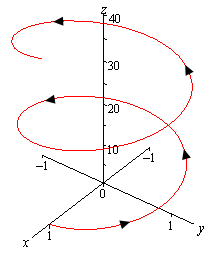

In [16]:
# THE GENERAL FRAMEWORK
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve 
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition
integrand


sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [17]:
# The scalar field f and the path C in parameter form are placed in the integrand of the general framework
integrand6= integrand.subs([(f, x*y*z), 
                            (x, cos(t)),
                            (y, sin(t)),
                            (z, 3*t)]).doit().simplify()
I = sp.integrate(integrand6, (t, 0, 4*pi))                                             # Integration with SymPy

print('The line integral of the function f along the path C  ≈', sp.N(I, 5))           # 5 digit approximation 
I

The line integral of the function f along the path C  ≈ -29.804


-3*sqrt(10)*pi

=========================================================================================================================

**Problem 1.** Evaluate $\displaystyle \int\limits_{C}({{3{x^2} - 2y)\,ds}}\,\,$ where $C$ is the line segment  from  &nbsp; $\left( { 3, 6} \right)$ to $\left( { 1, -1} \right)$.

In [18]:
# With 'sympy.geometry Segment' 
f = 3*C.x**2 - 2*C.y                                                                   # Scalar field in CoordSys3D('C')
sa = Segment((3, 6), (1, -1))                                                          # 2D line segment
vector_integrate(f, sa)   #.doit().simplify()                                          # Line integral 

8*sqrt(53)

 =========================================================================================================================

**Problem 2.** Evaluate $\displaystyle \int\limits_{C}({{2y{x^2} - 4x)\,ds}}\,\,$ where $C$ is the lower half of the circle centered at the origin of radius 3 with clockwise rotation.


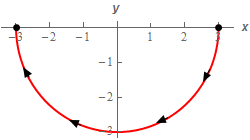

In [19]:
# THE GENERAL FRAMEWORK              (Needed after using "SymPy Curve" or 'sympy.geometry Segment')
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve 
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [20]:
# The scalar field f and the path C in parameter form are placed in the integrand of 
integrand2= integrand.subs([(f, 2*y*x**2 - 4*x),
                            (x, 3*cos(t)),
                            (y, -3*sin(t)),
                            (z, 0)]).doit().simplify()                      # Note the clockwise tracing y -> -3sin(t)
sp.integrate(integrand2, (t, 0, pi))                                    

-108

 =========================================================================================================================

**Problem 3.** Evaluate $\displaystyle \int\limits_{C}{{6x\,ds}}\,\,$ where $C$ is the portion of $y = {x^2}$ &nbsp; from  &nbsp; ${x = -1 } $  to  $ {x = 2} $. The direction of $C$ is in the direction of increasing $x$.

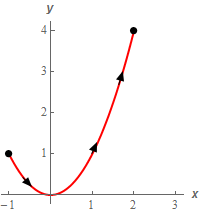

In [21]:
# The scalar field f and the path C in parameter form are placed in the integrand (in gener. framew. See Prbl. 2)
integrand6= integrand.subs([(f, 6*x),
                            (x, t),
                            (y, t**2),
                            (z, 0)]).doit().simplify()
sp.integrate(integrand6, (t, -1, 2))                                               

-5*sqrt(5)/2 + 17*sqrt(17)/2

In [22]:
# This can also be integrated using "SymPy Curve" (without using 'GENERAL FRAMEWORK')
f = 6*t                                                                            # Scalar field need to be parameterized
C3 = Curve((t, t**2), (t, -1, 2))                                                  # Parameterized 2D curve
vector_integrate(f, C3 )         #.doit().simplify()

-5*sqrt(5)/2 + 17*sqrt(17)/2

=========================================================================================================================

**Problem 4.** Evaluate $\displaystyle \int\limits_{C}{xy - 4z\,ds}\,\,$ where $C$ is the line segment   &nbsp; from  $\left( { 1, 1, 0} \right)$ to $\left( {2, 3, -2 } \right)$.

In [23]:
# With 'sympy.geometry Segment' (no need for 'GENERAL FRAMEWORK')
f = C.x*C.y - 4*C.z                                                                # Scalar field in CoordSys3D('C')
s = Segment((1,1,0), (2,3,-2))                                                     # 3D line segment
vector_integrate(f, s)   #.doit().simplify()                                       # Line integral 

43/2

=========================================================================================================================

**Problem 5.** Evaluate $\displaystyle \int\limits_{C}{x^2y^2\,ds}\,\,$ where $C$ is the circle centered at the origin of radius 2 centered on the $y$-axis at $y = 4. $


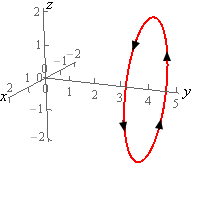

In [24]:
# The  FRAMEWORK
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve 
f = f(x,y,z)                                                                   # Scalar field 
integrand = f*sp.diff(r,t).norm()                                              # From the definition

# The scalar field f and the path C in parameter form are placed in the integrand of 
integrand = integrand.subs([(f, x**2*y**2),
                            (x, 2*cos(t)),
                            (y, 4),
                            (z, -2*sin(t))]).doit().simplify()
sp.integrate(integrand, (t, 0, 2*pi))                                     

128*pi

=========================================================================================================================

**Problem 6.** Evaluate $\displaystyle \int\limits_{C}{16y^5\,ds}\,\,$ where $C$ is the portion of $x = y^4$ from $y = 0$  to $y = 1$ followed by the line segment from $(1, 1)$ to $(1, -2)$ which in turn is followed by the line segment from $(1, -2)$ to $(2, 0)$.

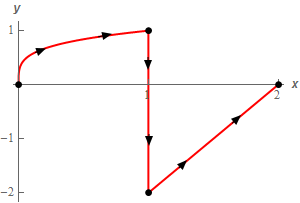

Here we calculate the whole problem with  Curve() and Segment() functions.

In [25]:
#C1: With 'Curve'.    Parameterization x = t^4,  y = t
f = 16*t**5                                                                       # Scalar field need to be parameterized
C1 = Curve((t**4, t), (t, 0, 1))                                                  # Parameterized 2D curve
I1 = sp.N(vector_integrate(f, C3 ), 7)        
print('I1 =', I1)

I1 = 604.8171


In [26]:
#C2: With 'Segment'  
f = 16*C.y**5                                                                      # Scalar field in CoordSys3D('C')
s2 = Segment((1,1,0), (1,-2, 0))                                                   # 2D line segment
I2 = vector_integrate(f, s2)                                                       # Line integral 
print('I2 =', I2)

I2 = -168


In [27]:
#C3: With 'sympy.geometry Segment'  
f = 16*C.y**5                                                                      # Scalar field in CoordSys3D('C')
s3 = Segment((1,-2,0), (2, 0, 0))                                                  # 2D line segment
I3 = sp.N(vector_integrate(f, s3), 7)                                              # Line integral 
print('I3 =', I3)

I3 = -190.8111


In [28]:
# Adding up the three line integrals:
print('I =', I1 + I2 + I3)

I = 246.0060


=========================================================================================================================

**Problem 7.** Evaluate $\displaystyle \int\limits_{C}{4y - x}\,ds\,\,$ where $C$ is the upper portion of the circle centered at the origin of radius $3$ from $\displaystyle\left( {\frac{3}{{\sqrt 2 }},\frac{3}{{\sqrt 2 }}} \right)$ to $\displaystyle\left( { - \frac{3}{{\sqrt 2 }}, - \frac{3}{{\sqrt 2 }}} \right)$  in the counter clockwise rotation followed by the line segment from $\displaystyle\left( { - \frac{3}{{\sqrt 2 }}, - \frac{3}{{\sqrt 2 }}} \right)$ to  $\displaystyle\left( {4, - \frac{3}{{\sqrt 2 }}} \right)$ which in turn is followed by the line segment from 
$\displaystyle\left( {4, - \frac{3}{{\sqrt 2 }}} \right)$ to $\left( {4,4} \right).$

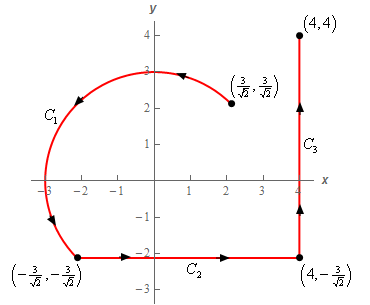

In [29]:
# Piecewise integration

# The framework for C1
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition of line integral
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [30]:
# The scalar field f and the path C1 in parameter form are placed in the integrand
integrand_1 = integrand.subs([(f, 4*y - x),
                             (x, 3*cos(t)),
                             (y, 3*sin(t)),
                             (z, 0)]).doit().simplify()
# Integration limits
lim1 = sp.atan2(3/sqrt(2), 3/sqrt(2))                                                       # =   pi/4
lim2 = sp.atan2(-3/sqrt(2), -3/sqrt(2))                                                     # = -3pi/4 = 5*pi/4  

I1 = sp.integrate(integrand_1, (t, lim1, lim2))                                             # Integration with SymPy
print('The line integral of the function f along the path C1:   I1 ≈', sp.N(I1, 5))         # 5 digit approximation 
I1

The line integral of the function f along the path C1:   I1 ≈ 63.640


45*sqrt(2)

In [31]:
# C2 and C3 with 'Segment' 
f = 4*C.y - C.x                                                                        # Scalar field in CoordSys3D('C')
C2 = Segment((-3/sqrt(2), -3/sqrt(2)), (4, -3/sqrt(2)))                                # 2D line segment
I2 = vector_integrate(f, C2)                                                           
print('I2 ≈', sp.N(I2, 5))                                                             # 5 digit approximation   
I2       

I2 ≈ -57.691


-24*sqrt(2) - 95/4

In [32]:
C3 = Segment((4, -3/sqrt(2)), (4, 4))       
I3 = vector_integrate(f, C3)    
print('I3 ≈', sp.N(I3, 5))  
I3

I3 ≈ -1.4853


7 - 6*sqrt(2)

In [33]:
# Adding up the three line integrals
I = I1 + I2 + I3
print('I  ≈', sp.N(I, 5) )
I

I  ≈ 4.4632


-67/4 + 15*sqrt(2)

=========================================================================================================================

**Problem 8.** Evaluate $\displaystyle \int\limits_{C}{y^3 - x^2}\,ds\,\,$for each of the following curves.

**(a)** See the picture below 

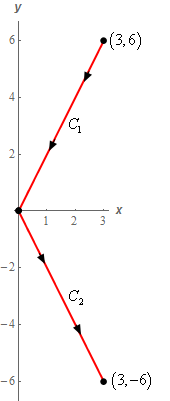

In [34]:
# C1  with 'sympy.geometry Segment' 
f = C.y**3 - C.x**2                                                                    # Scalar field in CoordSys3D('C')
C1 = Segment((3, 6), (0, 0))                                                           # 2D line segment
I1 = vector_integrate(f, C1)                                                         
print('I1 ≈', sp.N(I1, 5))                                                             # 5 digit approximation   
I1       

I1 ≈ 342.12


153*sqrt(5)

In [35]:
# C2  with 'sympy.geometry Segment' 
f = C.y**3 - C.x**2                                                                    # Scalar field in CoordSys3D('C')
C2 = Segment((0, 0), (3, -6))                                                          # 2D line segment
I2 = vector_integrate(f, C2)                                                           
print('I2 ≈', sp.N(I2, 5))                                                             # 5 digit approximation   
I2       

I2 ≈ -382.37


-171*sqrt(5)

In [36]:
# The line integral along combined path of C1 and C2
I = I1 + I2
print('I ≈', sp.N(I, 5))   
I

I ≈ -40.249


-18*sqrt(5)

**(b)**  As shown directly from the point (3, 6) to (3, -6)

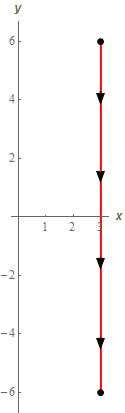

In [37]:
# C3:  
f = C.y**3 - C.x**2                                                                    # Scalar field in CoordSys3D('C')
C3 = Segment((3, 6), (3, -6))                                                          # 2D line segment
I3 = vector_integrate(f, C3)                                                           
print('I3 ≈', sp.N(I3, 5))                                                             # 5 digit approximation   
I3       

I3 ≈ -108.00


-108

=========================================================================================================================

**Problem 9.** Evaluate $\displaystyle \int\limits_{C}{4x^2}\,ds\,\,$ for each of the following curves.

**(a)** See the picture below 



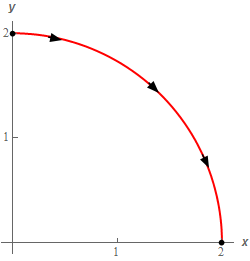

In [38]:
# The framework 
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition of line integral
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [39]:
# The scalar field f and the path C in parameter form are placed in the integrand
integrand_a = integrand.subs([(f, 4*x**2),
                             (x, 2*cos(t)),
                             (y, 2*sin(t)),
                             (z, 0)]).doit().simplify()

Ia = sp.integrate(integrand_a, (t,  0, pi/2,))                                        # Integration with SymPy
print(' Ia ≈', sp.N(Ia, 5))                                                           # 5 digit approximation 
Ia

 Ia ≈ 25.133


8*pi

**(b)** See the picture below 

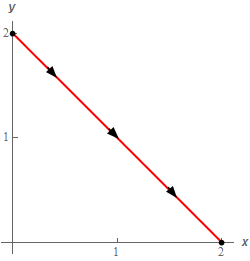

In [40]:
# With 'sympy.geometry Segment' 
f = 4*C.x**2                                                                        # Scalar field in CoordSys3D('C')
Cb = Segment((0, 2), (2, 0))                                                        # 2D line segment
Ib = vector_integrate(f, Cb)                                                        # Line integral 
print('Ib ≈', sp.N(Ib, 5))                                                          # 5 digit approximation   
Ib       

Ib ≈ 15.085


32*sqrt(2)/3

=========================================================================================================================

**Problem 10.** Evaluate $\displaystyle \int\limits_{C}{2x^3}\,ds\,\,$ for each of the following curves.

**(a)**  $\, C$ is the portion  $y = x^3$ from $x = -1$ to $x = 2$.



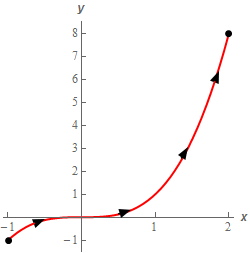

In [41]:
# The framework 
t = sp.symbols('t', real=True)                                                 # Parameter variable
x, y, z, f = sp.symbols('x y z f', cls=sp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = sp.Matrix([x, y, z])                                                       # Position vector to the points on the curve
f = f(x,y,z)                                                                   # Scalar field
integrand = f*sp.diff(r,t).norm()                                              # From the definition of line integral
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [42]:
# The scalar field f and the path C in parameter form are placed in the integrand
integrand_a= integrand.subs([(f, 2*x**3),
                             (x, t),
                             (y, t**3),
                             (z, 0)]).doit().simplify()
Ia = sp.integrate(integrand_a, (t, -1, 2))                                         # Integration with SymPy
print('Ia ≈', sp.N(Ia, 6))                                                         # 6 digit approximation   

Ia ≈ 63.4966


In [43]:
#a) With 'Curve'.    Parameterization x = t,  y = t^3   (no need for 'FRAMEWORK')
f = 2*t**3                                                                         # Scalar field need to be parameterized
Ca = Curve((t, t**3), (t, -1, 2))                                                  # Parameterized 2D curve
Ia = sp.N(vector_integrate(f, Ca ), 7)        
print('Ia =', Ia)

Ia = 63.49661


**(b)** Evaluate the same curve $C$ in the opposite direction, from $x = 2$ to $x = -1$.

Here we just need to change the parameterization of the curve by setting $x = -t$ and the integration from $t = -2$ to  $ t = 1.$ 
In this way as $t$ increases $x$ will go from $x = 2$ to $x = − 1$.


In [44]:
# The scalar field f and the path C in parameter form are placed in the integrand
integrand_b= integrand.subs([(f, 2*x**3),
                             (x, -t),
                             (y, (-t)**3),
                             (z, 0)]).doit().simplify()
Ib = sp.integrate(integrand_b, (t, -2, 1))                                               # Integration with SymPy
print('Ib ≈', sp.N(Ib, 6))                                                               # 6 digit approximation  
print('Exactly the same value as the line integral from the part (a) as it should be.')

Ib ≈ Integral(sqrt(9*t**4 + 1)*f(-t, -t**3, 0), (t, -2, 1))
Exactly the same value as the line integral from the part (a) as it should be.


=================================

Codes: Heikki Miettinen 2024
